Cargando datos...
Tenemos 286 filas y 15 columnas
Datos escalados:


,PORCENTAJE_POBREZA,RATIO_VIOLENCIA,RATIO_DE_AÑOS_DE_ESTUDIO_PROMEDIO,RATIO_DE_INGRESO_PER_CAPITA,PORCENTAJE_DE_ACCESO_A_SERVICIOS_BASICOS
0,1.500523,-0.914153,-1.841217,-0.192425,-0.761273
1,1.718219,-0.733070,-1.841217,-0.586433,-0.468775
2,2.029214,-0.728543,-1.714840,-0.628952,-0.680369
3,1.329475,-0.642528,-1.588462,-0.351162,-0.574572
4,1.127329,-0.633474,-1.588462,-0.626117,-0.394095
5,0.754135,-0.366377,-1.335706,-0.586433,-0.138937
6,0.645287,-0.162658,-1.209328,-0.816035,-0.282074
7,0.412041,0.258360,-0.956573,-0.773516,-0.207394
8,0.847434,-0.085698,-1.082951,-0.954930,0.190900
9,0.380941,0.185927,-0.830195,-0.594937,0.209570


Datos originales:


,AÑO,DEPARTAMENTO,POBLACION TOTAL,POBLACION POBRE EXTREMO,POBLACION POBRE NO EXTREMO,POBLACION NO POBRE,PORCENTAJE_POBREZA,PORCENTAJE POBREZA EXTREMA,CASOS REPORTADOS DE VIOLENCIA,RATIO_VIOLENCIA,PROMEDIO DE AÑOS DE ESTUDIO,RATIO_DE_AÑOS_DE_ESTUDIO_PROMEDIO,INGRESO REAL PROMEDIO PER CAPITA MENSUAL,RATIO_DE_INGRESO_PER_CAPITA,PORCENTAJE_DE_ACCESO_A_SERVICIOS_BASICOS
0,2012,AMAZONAS,"436,165","63,148","130,853","242,164",0.445,0.145,666,0.00153,8.3,0.755,774,1.147,0.500
1,2013,AMAZONAS,"437,480","69,125","137,863","230,492",0.473,0.158,844,0.00193,8.3,0.755,756,1.008,0.547
2,2014,AMAZONAS,"441,984","62,491","164,295","215,198",0.513,0.141,856,0.00194,8.4,0.764,745,0.993,0.513
3,2015,AMAZONAS,"443,783","46,598","141,065","256,120",0.423,0.105,945,0.00213,8.5,0.773,818,1.091,0.530
4,2016,AMAZONAS,"442,069","50,679","124,866","266,524",0.397,0.115,949,0.00215,8.5,0.773,845,0.994,0.559
5,2017,AMAZONAS,"438,629","41,637","111,358","285,634",0.349,0.095,1200,0.00274,8.7,0.791,857,1.008,0.600
6,2018,AMAZONAS,"437,752","27,083","119,620","291,049",0.335,0.062,1397,0.00319,8.8,0.800,881,0.927,0.577
7,2019,AMAZONAS,"439,625","17,251","116,784","305,590",0.305,0.039,1810,0.00412,9.0,0.818,895,0.942,0.589
8,2020,AMAZONAS,"433,062","33,491","122,925","276,646",0.361,0.077,1454,0.00336,8.9,0.809,834,0.878,0.653
9,2021,AMAZONAS,"434,505","39,157","91,613","303,735",0.301,0.090,1720,0.00396,9.1,0.827,955,1.005,0.656


Aplicando clustering...
Visualizando...


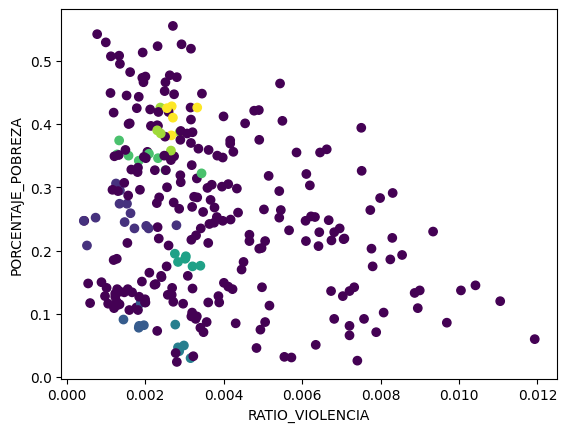

In [5]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def load_data(file_path):
    # Cargar el dataset
    df = pd.read_csv(file_path)
    row, col = df.shape
    print(f'Tenemos {row} filas y {col} columnas')

    # Lista de columnas para el clustering
    variables_clustering = [
        'PORCENTAJE_POBREZA', 'RATIO_VIOLENCIA', 
        'RATIO_DE_AÑOS_DE_ESTUDIO_PROMEDIO', 
        'RATIO_DE_INGRESO_PER_CAPITA', 
        'PORCENTAJE_DE_ACCESO_A_SERVICIOS_BASICOS'
    ]

    # Verificar que las columnas existan en el DataFrame
    for column in variables_clustering:
        if column not in df.columns:
            raise ValueError(f"La columna {column} no existe en el DataFrame")

    # Manejo de valores faltantes
    imputer = SimpleImputer(strategy='mean')
    df[variables_clustering] = imputer.fit_transform(df[variables_clustering])

    # Escalado de datos
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[variables_clustering]), columns=variables_clustering)

    return df_scaled, df

# aplicar la tecnica de clustering a los datos escalados , la tecnica sera DBSCAN

def clustering(data):
    from sklearn.cluster import DBSCAN
    clustering = DBSCAN(eps=0.5, min_samples=5).fit(data)
    return clustering.labels_

# visualizacion de los datos en un grafico de dispersion

def visual(data):
    import matplotlib.pyplot as plt
    plt.scatter(data['RATIO_VIOLENCIA'], data['PORCENTAJE_POBREZA'], c=data['CLUSTER'])
    plt.xlabel('RATIO_VIOLENCIA')
    plt.ylabel('PORCENTAJE_POBREZA')
    plt.show()

if __name__ == '__main__':
    print('Cargando datos...')
    data_escalada, data_original = load_data('./SI_DATA_POBREZA.csv')

    print('Datos escalados:')
    display(data_escalada.head(10))

    print('Datos originales:')
    display(data_original.head(10))

    print('Aplicando clustering...')
    data_original['CLUSTER'] = clustering(data_escalada)

    print('Visualizando...')
    visual(data_original)

    
